## Importing Libraries

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the DataSet

In [173]:
# Reading the dataset
df = pd.read_csv('/content/dataset - netflix1.csv')
df.set_index('show_id')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Understanding Of Data

In [174]:
# Validating the column name
df.columns = [x.lower().strip() for x in df.columns]

In [175]:
# summarizing the data
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [176]:
# Reading the shape of data
df.shape

(8790, 10)

In [177]:
# Statistical summary of data
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Validation

In [178]:
# Standardizing the data tyes
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [179]:
# Changing Date type to Datatime
df['date_added'] = pd.to_datetime(df['date_added'])

In [180]:
# Re-checking the data type
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


## Identifying Missing Values

In [181]:
# Treating Missing Values
df.isna().mean()

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

* No missing values detected in data



In [ ]:
# creating data frame with categorical columns to extract unique values
obj_col = df.select_dtypes(include = object)
obj_col

In [ ]:
for x in obj_col.columns:
  print(' '*9)
  print(x.upper())
  print(' '*9)
  print(obj_col[x].value_counts()/sum((obj_col[x].value_counts()))*100)
  print('****'*3)
  print(' '*9)



* IN THE DIRECTOR COLUMN THERE IS CLOSE TO 30% MISSING DATA, AS THE MISSING DATA IS COMPLETELY AT RANDOM, WE CAN DROP THE COLUMN



In [184]:
# Dropping the column
df= df.drop(columns ='director', axis =1)

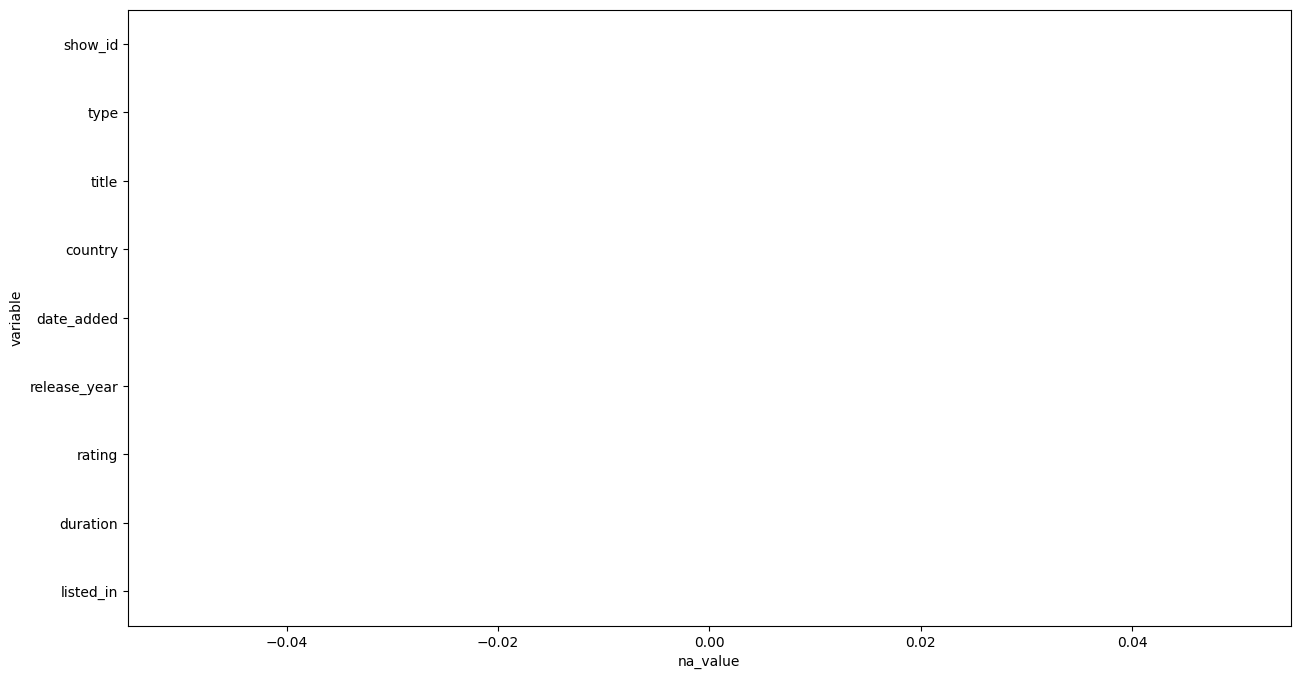

In [185]:
# Missing value visualization
nulls = df.isna().mean().reset_index()
nulls = nulls.rename(columns = {'index':'variable', 0:'na_value'})
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(data = nulls, y = 'variable', x ='na_value', palette = 'Blues_r', orient = 'h');


* No missing values are detected.

## Outlier Treatment

In [186]:
# Treating Outliers
df.describe(percentiles = [.1,.25,.5,.75,.99])

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
10%,2006.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
99%,2021.000000
max,2021.000000


<Axes: >

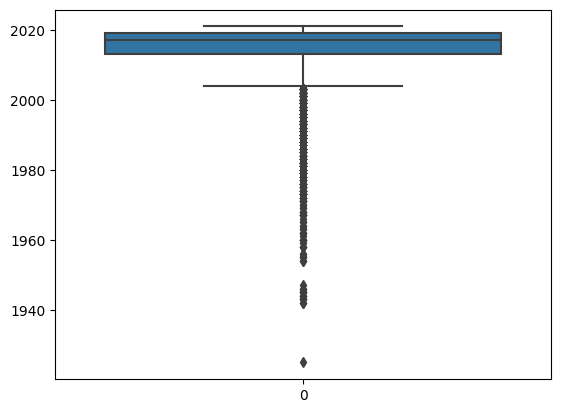

In [187]:
# Plotting a box and whisker plot to see outliers
sns.boxplot(df['release_year'])

In [188]:
# Creating Inter-Quartile Range to detect outliers
# iqr = q3 -q1
# outlier = q1 - 1.5(iqr) or q3+ 1.5(iqr)
iqr = np.percentile(df['release_year'],75)- np.percentile(df['release_year'], 25)

In [189]:
# Outlier detection
outlier = [np.percentile(df['release_year'],25)-1.5*iqr, np.percentile(df['release_year'],75) + 1.5*iqr]

In [190]:
# Creating 25 percentile variable to replace
impute = df['release_year'].quantile(0.25)

In [191]:
# removing outliers
df['release_year'] = df['release_year'].apply(lambda x: impute if x < outlier[0] else x)

In [192]:
# Statistical summary of the data
df.describe(percentiles = [.1, .25, .5,.75, .99])

,release_year
count,8790.000000
mean,2016.039932
std,3.739939
min,2004.000000
10%,2011.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
99%,2021.000000
max,2021.000000


<Axes: >

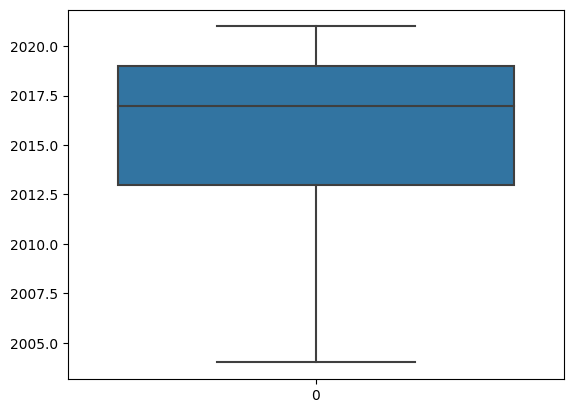

In [193]:
# Plotting a box and whisker plot to see outliers
sns.boxplot(df['release_year'])

## Removing Duplicates

In [194]:
# Remove duplicates
df.drop_duplicates(inplace = True)

## Reading the final cleaned data

In [195]:
# Reading the final data
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,France,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,United States,2021-09-24,2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Brazil,2021-09-22,2021.0,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,United States,2021-09-24,2013.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
